<a href="https://colab.research.google.com/github/AnjanaJayakumar/Iris-Classification-using-Machine-Learning-Algorithms/blob/main/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Iris Flower Dataset

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as Support Vector Machines


---



## Get Data Directly From Kaggle

The following steps help in downloading the dataset from Kaggle directly into Google Drive. This eliminates the usual process of downloading the dataset from Kaggle to the local device and then uploading it into Google Drive. 

**NOTE:** You should have a Kaggle account to proceed with this.

<br>

### Getting Your Kaggle API Token
- Go to your Kaggle account and click on *Create New API Token*.
- A file named kaggle.json will get downloaded containing your username and token key

If you are using Google Colab, create a new folder called kaggle in the Google Drive directory where you want to download the dataset and upload the `kaggle.json` file here. If you are using your local device, follow the instructions given under **Installations** in [Official Kaggle API Github Page](https://github.com/Kaggle/kaggle-api)

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import OS for navigation and environment set up
import os

# set the current working directory
drive_path = '/content/drive/MyDrive/Machine Learning/ML Practice'
os.chdir(drive_path)

# provide the config path to kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Machine Learning/ML Practice/kaggle'

In [8]:
# import the custom kaggle_utils module for downloading and extracting the dataset from Kaggle
# note: this custom module uses the python package subprocess for running the Kaggle command. 
# ensure that this package is installed in your system
import kaggle_utils

In [4]:
# define the paths
zip_path = '/content/drive/MyDrive/Machine Learning/ML Practice/kaggle'         # path where the zip file is to be downloaded from Kaggle
data_path = '/content/drive/MyDrive/Machine Learning/ML Practice/Dataset'       # path to extract content of the downloaded zip file

# get API for the dataset
data_api = 'kaggle datasets download -d uciml/iris'

# call the function to fetch the Kaggle dataset and extract the contents of the zip file
kaggle_utils.download_and_unzip(drive_path=zip_path, 
                                extract_path=data_path, 
                                kaggle_api=data_api, 
                                folder_name='Iris')

[INFO]: The file " iris.zip " already exists in the given folder.
Would you like to force download the file again?
[NOTE]: Force download will replace the existing zipfile in your folder. 
(Y / N) : y
Downloaded the dataset from Kaggle and replaced the file in the destination...

[NOTE]: The file(s) to be extracted already exists in the destination folder
Would you like to replace them? 
(Y / N): y
Extracted successfully.
ALL DONE!


## Get The Dataset

In [9]:
# import the initial necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# get the Iris.csv file as a pandas dataframe
iris_dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/ML Practice/Dataset/Iris/Iris.csv')
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Some Exploratory Data Analysis

Before working with the dataset, it is important that we explore and understand the dataset.

In [11]:
# get some basic information
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**_Observations_:**
- No missing values in the dataset
- Size of the dataset is 150
- Except for Id and Species, the rest are numerical values

In [14]:
# check out the different species available in the dataset
iris_dataset['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**_Observations:_**
- 3 different species of iris are considered here - _Iris-virginica, Iris-versicolor and Iris-setosa_
- This is a balanced dataset

In [15]:
# get statistical summary of the numerical features
iris_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**_NOTE_**:

This allows us to get a quick overview of the data. We can check for outliers by looking at the min and max values of each column in relation to the mean. Spend a bit of time looking through this chart to begin understanding the spread of the data.

### Simple Data Visualizations

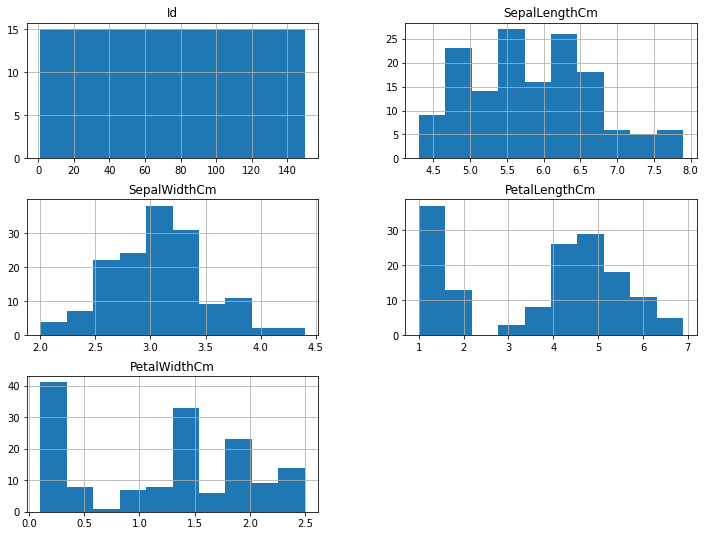

In [17]:
# plot a histogram to better visualize the range and spread of the numerical features
iris_dataset.hist(bins=10, figsize=(12,9))
plt.show()

In [18]:
# visualize using plot how length and width of sepals and petals varies for each species
def visualize_data(x_data, y_data):
  sns.FacetGrid(data=iris_dataset, hue='Species', height=5).map(plt.scatter, x_data, y_data).add_legend()

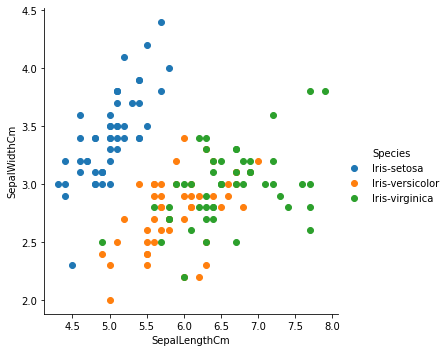

In [20]:
# check for sepal length and width
visualize_data('SepalLengthCm', 'SepalWidthCm')

**_Observations:_**
- Virginica and versica look to be relatively similar in sepal size, but setosa has created its own cluster to the left.

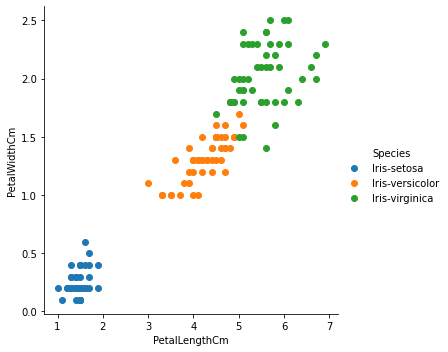

In [21]:
# check for Petal length and width
visualize_data('PetalLengthCm', 'PetalWidthCm')

**_Observations:_**
- The differences are more prominent in the petal width and length than in sepal width and length
- Iris-setosa seems to be the smallest flower of the three

#### Correlations
The higher the number is, the greater the correlation between the two elements. A high positive correlation indicates that the two elements have a positive linear relationship (as one increases the other also increases), and a low negative correlation indicates a negative linear relationship (as one increases the other decreases).

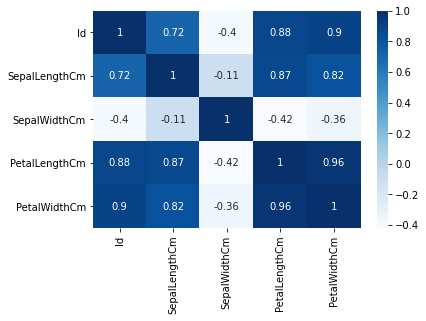

In [23]:
# correlations between features
sns.heatmap(data=iris_dataset.corr(), annot=True, cmap='Blues')

**_Observations:_**
- Petal width and petal length is highly correlated

## Data Preparation

In this step, we will clean our dataset so that unwanted rows are dropped, missing values (if any) are added, do feature scaling (if values vary greatly in range), ...

<br>

**Data preparation steps for the iris dataset:**
- drop the column "Id" since this provides no useful information in predicting the type of iris. 
- split the dataset into features (X) and labels (y)
- encode the values in column "Species" since this is now a categorical variable and most machine learning algorithms expect numerical values
- split into train and test sets

### Drop Unwanted Columns

In [24]:
# drop the Id column since this does not provide any useful information
iris_dataset = iris_dataset.drop(labels=['Id'], axis=1)

# checkout the dataset after dropping the column
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Split Into Features and Labels

In [25]:
iris_features = iris_dataset.iloc[:, :-1]
iris_label = iris_dataset[['Species']]

### Replace Categorical Attributes With Numerical Values

In [26]:
# create a dictionary of the values
species_lookup = {"Species": {"Iris-versicolor": 0, "Iris-setosa": 1, "Iris-virginica": 2}}

# convert the columns to numbers
iris_label_enc = iris_label.replace(species_lookup)

### Split Into Train And Test Sets

In [27]:
# import necessary library
from sklearn.model_selection import train_test_split

In [28]:
# create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(iris_features, iris_label_enc, test_size=0.2, random_state=42)

# check out the shape of the resulting arrays
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [37]:
# flatten the arrays y_train and y_test
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# check out the shapes
y_train.shape, y_test.shape

((120,), (30,))

## Model Comparisons

The question of the hour - _which machine learning algorithm would best fit the iris dataset we have?_

Of course, there are several theoretical considerations we can take into account. 
- If the features show strong linear relationships to the dependent variable (target), a linear model is likely to work best. 
- If the relationships are non-linear, then maybe an SVM or instance-based classifier like K-Nearest Neighbors would be best. 
- If explainability in crucial, a tree based model may be the way to go. 

And so on...

Unfortunately, there is no clear answer on which model would be the best. Thus, for the purpose of finding the optimal model, we can compare the desired models with each other and choose the one that gives the best result.

In [94]:
# import the necessary models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# import additional classes
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
def run_models(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
  '''
  Lightweight function to test and compare multiple models on the same dataset

  Params:
    X_train: training split
    y_train: training target vector
    X_test: test split
    y_test: test target vector

  Returns:
    DataFrame of predictions
  '''


  models = [
            ('LogReg', LogisticRegression()),     
            ('RForest', RandomForestClassifier()),
            ('KNN', KNeighborsClassifier()),
            ('SVM', SVC()),                       
            ('GaussNB', GaussianNB()),            
            ('XGB', XGBClassifier())              
            ]

  scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
  target_names = ["Iris-versicolor", "Iris-setosa", "Iris-virginica"]

  model_comparisons = []

  print('CLASSIFICATION REPORT: \n')

  for name, model in models:
    # Split dataset into k consecutive folds (without shuffling by default).
    # Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

    # Evaluate metric(s) by cross-validation and also record fit/score times.
    cv_results = model_selection.cross_validate(estimator=model, X=X_train, y=y_train, cv=kfold, scoring=scoring)

    # train the model and get the predictions on the train set
    # NOTE: the models are not shown the test set until after the model is finalized and trained on the training data
    classifier = model.fit(X_train, y_train)
    y_pred = classifier.predict(X_train)
    
    
    # Build a text report showing the main classification metrics
    print('\n',name)
    print(classification_report(y_true=y_train, y_pred=y_pred, target_names=target_names))

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name

    model_comparisons.append(this_df)

  final_comparison = pd.concat(model_comparisons, ignore_index=True)
  
  # bring the column 'model' to the first
  first_col = final_comparison.pop('model')
  finals_comparison = final_comparison.insert(0, 'model', first_col)

  return final_comparison

In [91]:
# get the comparisons
model_comparisons_df = run_models(X_train, y_train, X_test, y_test)

CLASSIFICATION REPORT: 


 LogReg
                 precision    recall  f1-score   support

Iris-versicolor       1.00      0.93      0.96        41
    Iris-setosa       1.00      1.00      1.00        40
 Iris-virginica       0.93      1.00      0.96        39

       accuracy                           0.97       120
      macro avg       0.98      0.98      0.97       120
   weighted avg       0.98      0.97      0.97       120


 RForest
                 precision    recall  f1-score   support

Iris-versicolor       1.00      1.00      1.00        41
    Iris-setosa       1.00      1.00      1.00        40
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120


 KNN
                 precision    recall  f1-score   support

Iris-versicolor       0.97      0.93      0.95        41
    Iris-setosa       1.00     

In [92]:
print('MODEL COMPARISONS BASED ON THE METRICS PROVIDED: \n')
model_comparisons_df

MODEL COMPARISONS BASED ON THE METRICS PROVIDED: 



,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted
0,LogReg,0.033801,0.002941,0.958333,0.965278,0.958333,0.959235
1,LogReg,0.028501,0.002927,1.000000,1.000000,1.000000,1.000000
2,LogReg,0.021409,0.002904,0.916667,0.944444,0.916667,0.919048
3,LogReg,0.022165,0.002827,0.875000,0.877381,0.875000,0.874123
4,LogReg,0.025666,0.002911,1.000000,1.000000,1.000000,1.000000
5,RForest,0.140764,0.010662,0.916667,0.940476,0.916667,0.919444
6,RForest,0.135106,0.010629,0.958333,0.962963,0.958333,0.958462
7,RForest,0.148307,0.010626,0.916667,0.944444,0.916667,0.919048
8,RForest,0.150510,0.011301,0.833333,0.833333,0.833333,0.833333
9,RForest,0.139584,0.011256,1.000000,1.000000,1.000000,1.000000


**_Observations:_**
- Logistic Regression and KNN gives accuracy around 97% whereas the other algorithms give 100% accuracy (data might be overfit)
- Most models gave an F1 score of 1 (very confident) to Iris-setosa whereas the other 2 species got a score around .97. This probably might be because as seen in the scatter plot, the values of Iris-setosa was clearly apart from Iris-virginica and Iris-versicolor.


## Select And Train The Model(s)

We will select Logistic Regression and Random Forest and do further comparisons on these two models

### 1. Logistic Regression

For more information, check out https://machinelearningmastery.com/logistic-regression-for-machine-learning/

In [100]:
log_clf = LogisticRegression()

# fit the model on the training data
log_clf.fit(X=X_train, y=y_train)

# get the prediction on train and test sets
y_train_pred_log = log_clf.predict(X_train)
y_test_pred_log = log_clf.predict(X_test)

# get the accuracy on both the train and test sets
y_train_acc = accuracy_score(y_train, y_train_pred_log)
y_test_acc = accuracy_score(y_test, y_test_pred_log)

print("Accuracy of predictions on the train data is %0.3f" %y_train_acc)
print("Accuracy of predictions on the test data is %0.3f" %y_test_acc)

Accuracy of predictions on the train data is 0.975
Accuracy of predictions on the test data is 1.000


In [101]:
# get the confusion matrices
def conf_matrix(y_true, y_pred, label):
  print("Confusion matrix on the ", label, " set")
  cm = confusion_matrix(y_true, y_pred)
  print(cm, '\n')

# confusion matrix on train set
conf_matrix(y_train, y_train_pred_log, "train")

# confusion matrix on test set
conf_matrix(y_test, y_test_pred_log, "test")

Confusion matrix on the  train  set
[[38  0  3]
 [ 0 40  0]
 [ 0  0 39]] 

Confusion matrix on the  test  set
[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]] 



### 2. Random Forest Classifier

For more information, check out https://www.javatpoint.com/machine-learning-random-forest-algorithm

In [98]:
rforest_clf = RandomForestClassifier()

# fit the model on the training data
rforest_clf.fit(X_train, y_train)

# get the predictions
y_train_pred_rforest = rforest_clf.predict(X_train)
y_test_pred_rforest = rforest_clf.predict(X_test)

# get the accuracy on both the train and test sets
y_train_acc = accuracy_score(y_train, y_train_pred_rforest)
y_test_acc = accuracy_score(y_test, y_test_pred_rforest)

print("Accuracy of predictions on the train data is %0.3f" %y_train_acc)
print("Accuracy of predictions on the test data is %0.3f\n" %y_test_acc)

# confusion matrix on train set
conf_matrix(y_train, y_train_pred_rforest, "train")
# confusion matrix on test set
conf_matrix(y_test, y_test_pred_rforest, "test")

Accuracy of predictions on the train data is 1.000
Accuracy of predictions on the test data is 1.000

Confusion matrix on the  train  set
[[41  0  0]
 [ 0 40  0]
 [ 0  0 39]] 

Confusion matrix on the  test  set
[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 11]] 



**_Observations:_**
- Both logistic regression and random forest classifier give a 100% accuracy on the test set. This might be because of the train-test split (120 and 30)
- The random forest classifier performs better than logistic regression on the training set

#### Feature Importances After Fitting Random Forest Classifier

In [104]:
feature_names = iris_features.columns
feature_importances = rforest_clf.feature_importances_

for name, imp in zip(feature_names, feature_importances):
  print(name, '\t: ', imp)

SepalLengthCm 	:  0.08443449272321134
SepalWidthCm 	:  0.035598342205813815
PetalLengthCm 	:  0.44972996405684146
PetalWidthCm 	:  0.43023720101413343


**_Observations:_**
- The random forest classifier model gives the most importance to **petal length** and **petal width**
- Sepal lengths and widths have comparatively very low importance in classifying the species